In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')

In [54]:
df = data

In [55]:
df. head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [56]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [57]:
df.drop('stab', axis=1, inplace=True)

In [58]:
df['stabf'] = pd.get_dummies(df['stabf'])

In [61]:
x = df.drop('stabf', axis=1)
y = df['stabf']

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

In [63]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
pred = rf.predict(x_test)
pred_train = rf.predict(x_train)

In [86]:
#auc score
from sklearn.metrics import confusion_matrix, auc, recall_score, plot_roc_curve, roc_auc_score, roc_curve,accuracy_score
print('The auc score for the trained data is:', roc_auc_score(y_train, pred_train))
print('The auc score for the tested data is:', roc_auc_score(y_test, pred))
print('The auc score for the tested data is:', accuracy_score(y_test, pred))

The auc score for the trained data is: 1.0
The auc score for the tested data is: 0.904154162886454
The auc score for the tested data is: 0.917


In [66]:
ex = ExtraTreesClassifier()
ex.fit(x_train, y_train)

ExtraTreesClassifier()

In [73]:
ex_pred = ex.predict(x_test)
ex_pred_train = ex.predict(x_train)

In [74]:
print('The auc score for the trained data is:', roc_auc_score(y_train, ex_pred_train))
print('The auc score for the tested data is:', roc_auc_score(y_test, ex_pred))

The auc score for the trained data is: 1.0
The auc score for the tested data is: 0.8921461720985414


In [75]:
import xgboost as xgb
from lightgbm import LGBMClassifier

model = xgb.XGBClassifier(eval_metric='auc', random_state=1)
model1 = LGBMClassifier(eval_metric = 'auc', random_state=1)

In [77]:
model.fit(x_train, y_train)
xgb_pred = model.predict(x_test)

In [87]:
print('The auc score for the tested data is:', roc_auc_score(y_test, xgb_pred))
print('The auc score for the tested data is:', accuracy_score(y_test, xgb_pred))

The auc score for the tested data is: 0.9276074743527112
The auc score for the tested data is: 0.9375


In [81]:
model1.fit(x_train, y_train)
lgb_pred = model1.predict(x_test)

In [88]:
print('The auc score for the tested data is:', roc_auc_score(y_test, lgb_pred))
print('The auc score for the tested data is:', accuracy_score(y_test, lgb_pred))

The auc score for the tested data is: 0.9276074743527112
The auc score for the tested data is: 0.9375


In [91]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf, 
                       'min_samples_split': min_samples_split,'max_features': max_features}
clf = RandomizedSearchCV(ex, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [92]:
search = clf.fit(x_train, y_train)
search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [95]:
ex1 = ExtraTreesClassifier(n_estimators=1000, min_samples_split= 2, min_samples_leaf= 8, max_features= None)
ex1.fit(x_train, y_train)
ex1_pred = ex1.predict(x_test)
ex_1pred_train = ex1.predict(x_train)

In [96]:
print('The auc score for the tested data is:', accuracy_score(y_test, ex1_pred))

The auc score for the tested data is: 0.928


In [117]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        ex1.estimators_],
                                        axis = 0)

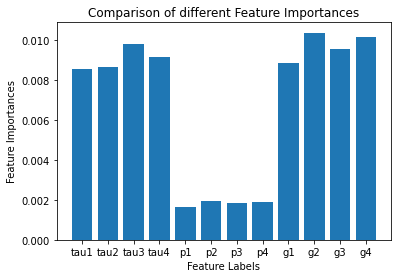

In [119]:
# Plotting a Bar Graph to compare the models
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()
